# Logistic Regression
### Credit Approval
#### http://archive.ics.uci.edu/ml/datasets/Credit+Approval

In [1]:
'''Local library'''
import sys
sys.path.insert(0, '../../regression/src/')
import regression_functions_utils as rfu

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [4]:
# Importing the dataset
data_file = '../../data/credit_approval/crx_clean.pkl'
dataset = pd.read_pickle(data_file)
print(dataset.head())
X = dataset.iloc[:, :15]
y = dataset.iloc[:, 15].values

  a1     a2     a3 a4 a5 a6 a7    a8  a9  a10  a11  a12 a13  a14  a15  class
0  a  58.67  4.460  u  g  q  h  3.04   1    1    6    0   g   43   43      1
1  a  24.50  0.500  u  g  q  h  1.50   1    0    0    0   g  280  280      1
2  b  27.83  1.540  u  g  w  v  3.75   1    1    5    1   g  100  100      1
3  b  20.17  5.625  u  g  w  v  1.71   1    0    0    0   s  120  120      1
4  b  32.08  4.000  u  g  m  v  2.50   1    0    0    1   g  360  360      1


### Data Exploration

#### Class Inbalance
Frequently, dependent variables in Logistic Regression show an inbalance of positive vs negative cases. 

In the current, case the inbalance is not that extreme, 65% of cases are negative, and 35% positive

Class counts


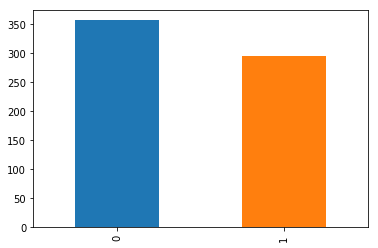

In [5]:
print('Class counts')
cc = dataset['class'].value_counts().plot('bar')

Class ratio


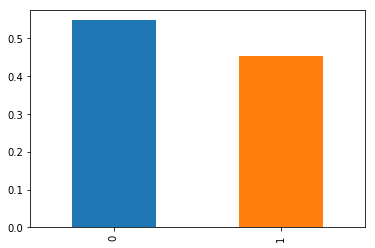

In [6]:
print('Class ratio')
cr = dataset['class'].value_counts(normalize=True).plot('bar')

#### Summarizing by class

Let's group by class, and check the average values of the independent variables

Luckly, the exploration will show a clear distinction of independent variable's values between the two classes

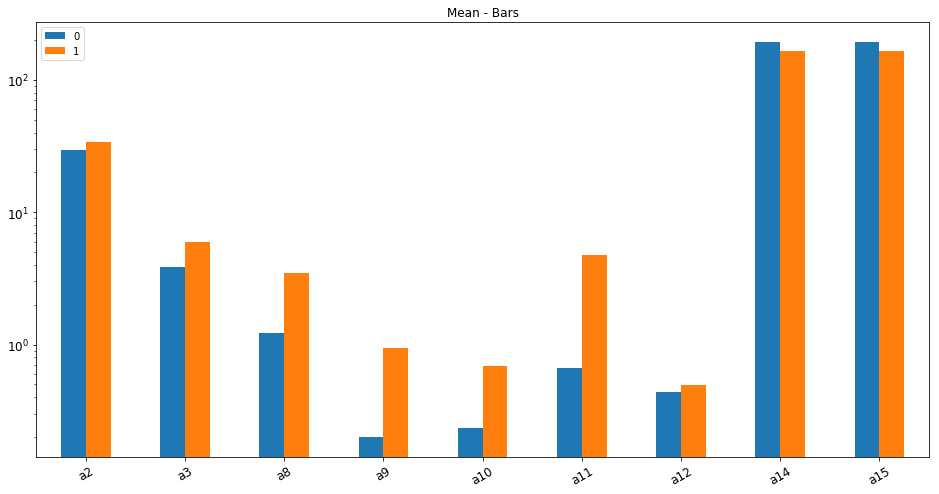

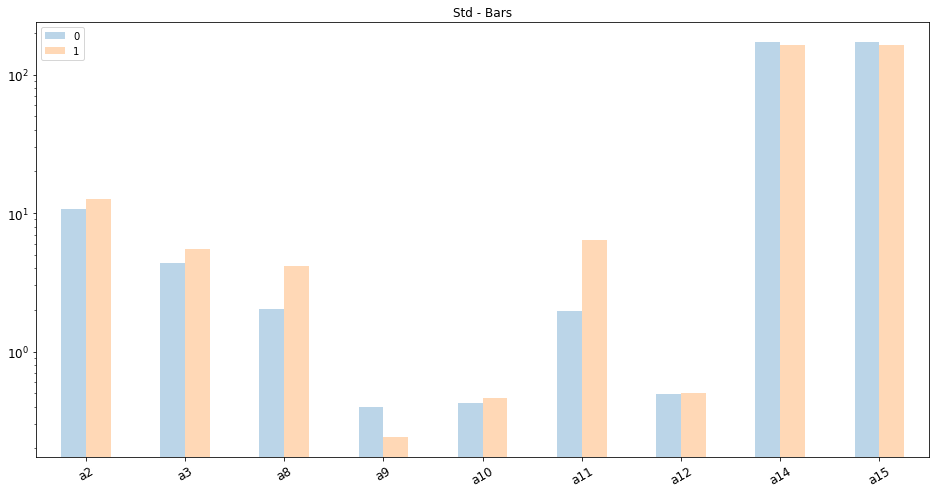

In [7]:
gbc_mean = dataset.iloc[:,1:].groupby('class').mean().reset_index()
gbc_std  = dataset.iloc[:,1:].groupby('class').std().reset_index()

gbc_mean.iloc[:,1:].transpose().plot.bar(figsize=(16,8), fontsize=12, rot=30,
                                         title='Mean - Bars', log=True)

gbc_std.iloc[:,1:].transpose().plot.bar(figsize=(16,8), fontsize=12, rot=30, 
                                        title='Std - Bars', log=True, alpha=.3)

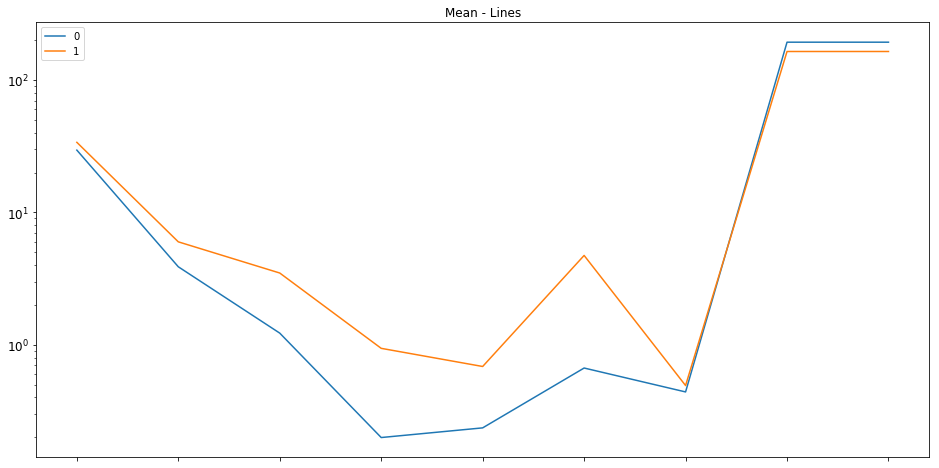

In [8]:
# c = dataset.select_dtypes(include=['float64', 'int64']).columns.tolist()[:-1]
# xs = [str(x) for x in c]
gbc_mean.iloc[:,1:].transpose().plot.line(figsize=(16,8), fontsize=12, #rot=30,
                                          title='Mean - Lines', logy=True ,xticks=None)



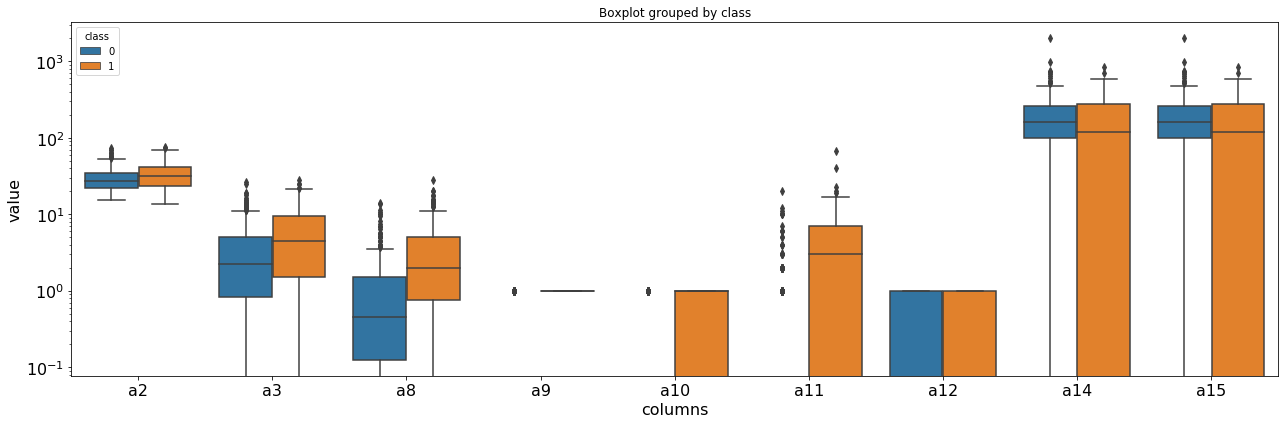

In [9]:
# https://stackoverflow.com/questions/49325050/seaborn-boxplot-and-log-axis
# https://stackoverflow.com/questions/44975337/side-by-side-boxplots-with-pandas
import seaborn as sns

# Get numeric columns, ignore class
c = dataset.select_dtypes(include=['float64', 'int64']).columns.tolist()[:-1]

df_melt = dataset.melt(id_vars = 'class',
                          value_vars = c,
                          var_name = 'columns')

fig, ax= plt.subplots(figsize=(18, 6))
ax.set_xlabel('Measures', fontsize=16) 
ax.set_ylabel('Size', fontsize=16)
ax.set_yscale('log')
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)

b = sns.boxplot(data = df_melt,
                hue = 'class', # different colors for different 'cls'
                x = 'columns',
                y = 'value',
                order = c
               )

plt.title('Boxplot grouped by class') # You can change the title here
plt.tight_layout()

### Model with all data
Using simple _LogisticRegression_ class

In [10]:
# Get numeric columns, ignore class
xs = ['a8', 'a11', 'a9', 'a10', 'a11']

X_train = X[xs] 
y_train = y

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_train)

# Making the Confusion Matrix
cm = confusion_matrix(y_train, y_pred)

print(cm.view())

from sklearn.metrics import classification_report 
print(classification_report(y_train, y_pred))

[[286  71]
 [ 18 277]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.87       357
           1       0.80      0.94      0.86       295

   micro avg       0.86      0.86      0.86       652
   macro avg       0.87      0.87      0.86       652
weighted avg       0.88      0.86      0.86       652



/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


It seems that it's kinf of easy for the model to correctly adjust to the data, given that
theres a clear separation between the values for positive and negative samples across independent variables.

### Model with all data
Using _LogisticRegressionCV_ class (CV is for 'Cross Validation')

See https://www.quora.com/What-is-the-difference-between-sklearn-linear_model-LogisticRegression-and-sklearn-linear_model-LogisticRegressionCV

In [15]:
from sklearn.linear_model import LogisticRegressionCV

In [23]:
classifier_cv = LogisticRegressionCV(cv=10, random_state=0).fit(X_train, y_train)

# Predicting the Test set results
y_pred_cv = classifier_cv.predict(X_train)

# Making the Confusion Matrix
cm_cv = confusion_matrix(y_train, y_pred_cv)

print(cm_cv.view())

print(classification_report(y_train, y_pred_cv))

[[286  71]
 [ 18 277]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.87       357
           1       0.80      0.94      0.86       295

   micro avg       0.86      0.86      0.86       652
   macro avg       0.87      0.87      0.86       652
weighted avg       0.88      0.86      0.86       652



__Both LogisticRegression and LogisticRegressionCV achieve identical results in this case__